#### Mục tiêu: Xây dựng mô hình phân loại(sử dụng hồi quy logistic) để dự đoán khả năng một khách hàng sẽ không mua hoặc sẽ mua một sản phẩm của công ty

#  Người thực hiện: Hoàng Duy Thiện Mạnh
### Mục tiêu chung: 
Xây dựng một mô hình dự đoán 
### Câu hỏi : 
Chi phí quản lý doanh nghiệp có ảnh hưởng ntn đối với doanh thu một nhóm công ty tương tự trong giai đoạn từ.. đến.. 
### Quy trình thực hiện 
1. Khai báo sử dụng các thư viện cần thiết 
2. Tải dữ liệu , trực quan hóa và khám phá 
3. Làm sạch dữ liệu 
4. Xử lý các giá trị ngoại lai 
Chuẩn hóa các biến nhằm khắc phục ảnh hưởng do khác biệt về thang đo
5. Chia tập dữ liệu thành tập huấn luyện và kiểm tra 
6. Xác định và ước tính mô hình hồi quy tuyến tính  bằng cách sử dụng tập dữ liệu huấn luyện với các biến độc lập và 01 biến phụ thuộ

7. Đối chiếu dữ liệu kiểm tra và dữ liệu dự đoán theo mô hình
8. Đánh giá mô hình sử dụng ma trận nhầm lẫn và hệ số độ chính xác
9. Sử dụng mô hình để đáp ứng các mục tiêu đặt ra.

In [70]:
#hồi quy ,phân loại và phân cụm nội dung kiểm tra

# 1. Khai báo các thư viện cần thiết¶

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)

# 2.Tải dữ liệu và trực quan hóa, khám phá

In [183]:
df = pd.read_csv("Social_Network_Ads.csv")

In [184]:
df.shape


(400, 5)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [186]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# 3. làm sạch dữ liêu

In [187]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [188]:
df.duplicated().sum()

0

<AxesSubplot:>

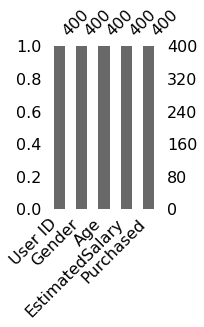

In [189]:
msno.bar(df, figsize= (2,3))

In [190]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [191]:
# thể hiện phân phối của chúng

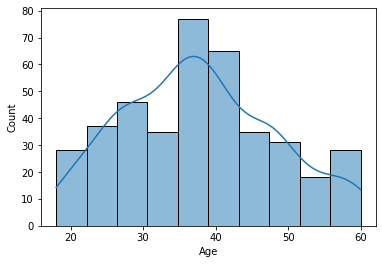

In [192]:
fig,ax = plt.subplots()
sns.histplot(data=df,x="Age", kde=True)
plt.show()

In [193]:
# có khoảng người độ tuổi 20 là 28 người, những người trong độ tuổi gần 40 tuổi chiếm tỷ lệ cao nhất

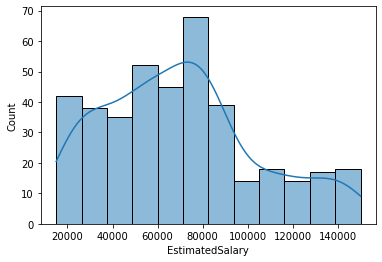

In [194]:
fig,ax = plt.subplots()
sns.histplot(data=df,x="EstimatedSalary", kde=True)
plt.show()

In [195]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [196]:
# 204 là nữ , 196 là nam

In [197]:
# 1: SẼ KHÔNG MUA, 0: SẼ MUA
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [198]:
# phù hợp với biến hồi quy logic

In [199]:
df["Purchased"].value_counts().values

array([257, 143], dtype=int64)

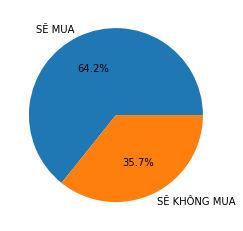

In [200]:
fig, ax =plt.subplots()


sizes= df["Purchased"].value_counts()
label = df["Purchased"].value_counts().index
label=['SẼ MUA', 'SẼ KHÔNG MUA']
ax.pie(sizes, labels=label, autopct="%.1f%%")
plt.show()

In [201]:
# Trong số khách hàng nam bao nhiêu người mua hoặc khách hàng nữ bao nhiêu ngày mua

In [202]:
df.groupby(['Gender', 'Purchased']).count()

User ID  Age  EstimatedSalary
Gender Purchased                               
Female 0              127  127              127
       1               77   77               77
Male   0              130  130              130
       1               66   66               66

In [203]:
# trong số nữ có 127 người mua và 77 ng không mua, trong số kh nam có 130 người mua, 66 người mua

In [204]:
#Xóa bỏ biến không liên quan

In [205]:
df.drop(columns="User ID", inplace=True)


In [206]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [207]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [ ]:
# thấy giá trị 0 thì là nam giới, 1 là nữ giới

In [209]:
df.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,400.00,400.00,400.00,400.00
mean,37.66,"69,742.50",0.36,0.49
std,10.48,"34,096.96",0.48,0.50
min,18.00,"15,000.00",0.00,0.00
25%,29.75,"43,000.00",0.00,0.00
50%,37.00,"70,000.00",0.00,0.00
75%,46.00,"88,000.00",1.00,1.00
max,60.00,"150,000.00",1.00,1.00


In [215]:
df[['Age','EstimatedSalary']].head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
scaler = StandardScaler() # Xác định pp chuẩn hóa nào
normalized_df = scaler.fit_transform(df[['Age','EstimatedSalary']])
normalized_df  = pd.DataFrame({"Age": normalized_df[:,0],
                            "EstimatedSalary": normalized_df[:,1]})
normalized_df = pd.concat([normalized_df,
                          df.iloc[:,2:]], axis=1)

# 4 .Trực quan hóa phân phối và xử lý giá trị ngoại lai

In [210]:
df.groupby("Purchased").count()

,Age,EstimatedSalary,Gender_Male
Purchased,,,
0,257,257,257
1,143,143,143


In [211]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

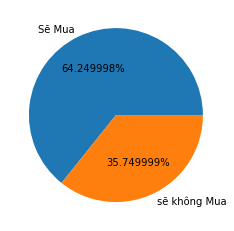

In [212]:
fig, ax =plt.subplots()

s= df["Purchased"].value_counts()
l = ["Sẽ Mua", "sẽ không Mua"]
ax.pie(s, labels=l, autopct="%1f%%")
plt.show()

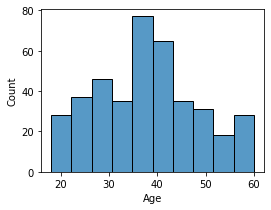

In [213]:
fig, ax =plt.subplots(figsize=(4,3))

sns.histplot(data=df, x="Age", ax=ax)

plt.show()

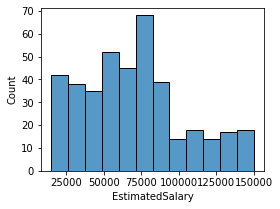

In [214]:
fig, ax =plt.subplots(figsize=(4,3))

sns.histplot(data=df, x="EstimatedSalary", ax=ax)

plt.show()

In [ ]:
fig, ax =plt.subplots(figsize=(4,3))

sns.boxplot(data=df, x="EstimatedSalary", ax=ax)

plt.show()

In [ ]:
# Phân tich khém phé sb Iuqng nguòi dâ quyêt dinh mua/không mua sàn phàm cùa công ty

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,6))
sns.countplot(x="Purchased", data=df,ax=ax[0])
sns.countplot(x="Purchased",hue="Gender" ,data=df,ax=ax[1])

plt.show()

In [ ]:
# Mã hóa thuộc tính Gender sử dụng kỹ thuật tạo biến giả OneHot coder

In [ ]:
encoder = OneHotEncoder()
encoded_matrix = encoder.fit_transform(df[["Gender"]]).toarray()
encoded_cols = encoder.get_feature_names_out(["Gender"])
encoded_df = pd.DataFrame(encoded_matrix,
                         columns=encoded_cols)
df = pd.concat([df,encoded_df], axis=1)

In [ ]:
df.head()

In [ ]:
# chuẩn hóa các thuộc tính

In [ ]:
scaler = StandardScaler() # Xác định pp chuẩn hóa nào
normalized_df=scaler.fit_transform(df[['Age','EstimatedSalary']])
normalized_df  = pd.DataFrame({"Age": normalized_df[:,0],
                            "EstimatedSalary": normalized_df[:,1]})
normalized_df = pd.concat([normalized_df,
                          df.iloc[:,2:]], axis=1)

In [ ]:
# chia tập dữ liệu ra huấn luyện và kiểm tra

In [ ]:
X = normalized_df[["Age","EstimatedSalary", "Gender_Male"]] #

y = normalized_df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state=45)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# xác định và ước tính mô hình hồi quy logistic bằng cách sử dụng tập dữ liệu huấn luyện

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# đối chiếu dữ liệu kiểm tra và dữ liệu dự đoán theo mô hình

In [ ]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [ ]:
y_pred

In [ ]:
# xác định các hệ số mô hình
model.coef_
model.intercept_

In [ ]:
# Đánh giá mô hình sử dụng ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

In [ ]:

sns.heatmap(pd.DataFrame(cf_matrix), annot=True,
           cmap="YlGnBu", fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
precision_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
# đánh giá tổng họep mô hình

In [ ]:
target_names =['NO', 'YES']

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))